In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.listdir('/content/drive')

['MyDrive', 'Shareddrives', '.shortcut-targets-by-id', '.Trash-0']

In [4]:
os.listdir('/content/drive/MyDrive/a2')

['DO23OPEN.csv']

In [5]:
import pandas as pd

caminho_arquivo = '/content/drive/MyDrive/a2/DO23OPEN.csv'

df = pd.read_csv(
    caminho_arquivo,
    sep=';',
    encoding='latin1',
    low_memory=False
)

df.head()

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2,1,2,14022023,1730.0,822.0,221110.0,12091956.0,466,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,3,1,2,14022023,500.0,822.0,220790.0,10011953.0,470,2,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN
3,4,1,2,14022023,2235.0,823.0,231180.0,15121943.0,479,2,...,NaN,NaN,NaN,NaN,NaN,NaN,I64,S,NaN,NaN
4,5,1,2,14022023,940.0,841.0,411350.0,9041973.0,449,2,...,NaN,M,NaN,NaN,NaN,NaN,C189,S,NaN,NaN


In [6]:
df.shape

(1465610, 86)

In [8]:
df['CAUSABAS'].head()

,CAUSABAS
0,I10
1,I678
2,K750
3,I611
4,C189


In [9]:
df_transito = df[df['CAUSABAS'].str.startswith('V', na=False)]
len(df_transito)

35938

In [10]:
df.columns

Index(['contador', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL',
       'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC',
       'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB',
       'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC',
       'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV',
       'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE',
       'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE',
       'NUMEROLOTE', 'DTINVESTIG', 'DTCADASTRO', 'ATESTANTE', 'STCODIFICA',
       'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'FONTEINV', 'DTRECEBIM',
       'ATESTADO', 'DTRECORIGA', 'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1',
       'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA', 'NUDIASOBCO',
       'DTCADINV', 'TPOBITOCOR', 'DTCONINV',

In [11]:
df_transito = df[df['CAUSABAS'].str.startswith('V', na=False)].copy()

print("Total de registros de acidentes de trânsito:", len(df_transito))
df_transito.head()

Total de registros de acidentes de trânsito: 35938


,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
22,23,1,2,14022023,2140.0,835.0,352430.0,3031971.0,451,1,...,NaN,NaN,NaN,NaN,NaN,NaN,V144,S,NaN,NaN
39,40,1,2,1012023,1027.0,824.0,240810.0,8121998.0,424,1,...,NaN,NaN,NaN,NaN,NaN,NaN,V234,N,NaN,NaN
75,76,1,2,1012023,1353.0,822.0,220280.0,7091958.0,464,1,...,NaN,NaN,NaN,NaN,NaN,NaN,V284,N,NaN,NaN
80,81,1,2,1012023,37.0,822.0,220840.0,5041972.0,450,1,...,NaN,NaN,NaN,NaN,NaN,NaN,V299,S,NaN,NaN
89,90,1,2,1012023,2005.0,821.0,210030.0,3081979.0,443,1,...,NaN,NaN,NaN,NaN,NaN,NaN,V892,NaN,NaN,NaN


In [12]:
df_transito['y_via_publica'] = (df_transito['LOCOCOR'] == 4).astype(int)

df_transito['y_via_publica'].value_counts()

,count
y_via_publica,
1,18407
0,17531


In [13]:
import numpy as np

df_clean = df_transito.copy()

In [14]:
def converter_idade(valor):
    if pd.isna(valor):
        return np.nan
    valor = str(valor).zfill(3)
    unidade = int(valor[0])
    numero = int(valor[1:])

    if unidade == 1:
        return 0
    elif unidade == 2:
        return 0
    elif unidade == 3:
        return 0
    elif unidade == 4:
        return numero
    elif unidade == 5:
        return numero + 100
    return np.nan

df_clean['IDADE'] = df_clean['IDADE'].apply(converter_idade)

# remover idades incorretas
df_clean.loc[df_clean['IDADE'] > 120, 'IDADE'] = np.nan

In [15]:
colunas_ignorado = ['SEXO', 'RACACOR', 'ESC', 'ESTCIV', 'ACIDTRAB', 'CIRCOBITO']

for col in colunas_ignorado:
    df_clean[col] = df_clean[col].replace({9: np.nan, 0: np.nan})


In [16]:
for col in colunas_ignorado:
    df_clean[col] = df_clean[col].fillna("Ignorado")

In [17]:
df_clean['IDADE'] = df_clean['IDADE'].fillna(df_clean['IDADE'].median())

In [18]:
colunas = ['IDADE', 'SEXO', 'RACACOR', 'ESC', 'ESTCIV', 'CIRCOBITO', 'ACIDTRAB', 'y_via_publica']

df_modelo = df_clean[colunas].copy()
df_modelo.head()

,IDADE,SEXO,RACACOR,ESC,ESTCIV,CIRCOBITO,ACIDTRAB,y_via_publica
22,51.0,1.0,4.0,2.0,1.0,1.0,Ignorado,1
39,24.0,1.0,4.0,Ignorado,1.0,1.0,Ignorado,1
75,64.0,1.0,2.0,1.0,3.0,1.0,2.0,0
80,50.0,1.0,4.0,4.0,2.0,1.0,Ignorado,0
89,43.0,1.0,4.0,1.0,1.0,1.0,2.0,0


In [19]:
df_modelo.isna().sum()

,0
IDADE,0
SEXO,0
RACACOR,0
ESC,0
ESTCIV,0
CIRCOBITO,0
ACIDTRAB,0
y_via_publica,0


In [20]:
df_clean['IDADE'].describe()
#Idade

,IDADE
count,35938.000000
mean,41.974345
std,18.174538
min,0.000000
25%,27.000000
50%,40.000000
75%,55.000000
max,115.000000


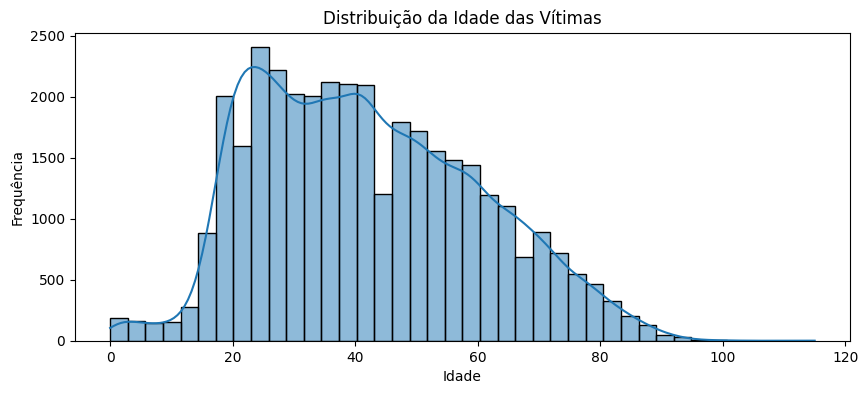

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.histplot(df_clean['IDADE'], bins=40, kde=True)
plt.title("Distribuição da Idade das Vítimas")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

In [22]:
df_clean['SEXO'].value_counts()
#Sexo

,count
SEXO,
1.0,29758
2.0,6164
Ignorado,16


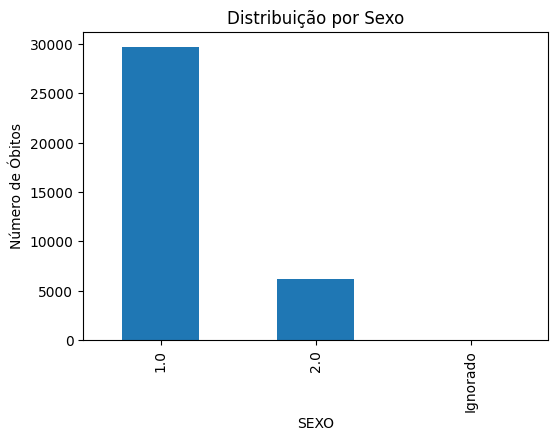

In [23]:
plt.figure(figsize=(6,4))
df_clean['SEXO'].value_counts().plot(kind='bar')
plt.title("Distribuição por Sexo")
plt.ylabel("Número de Óbitos")
plt.show()

In [24]:
df_clean['RACACOR'].value_counts()
#Raça/Cor

,count
RACACOR,
4.0,19649
1.0,13504
2.0,2142
Ignorado,403
5.0,160
3.0,80


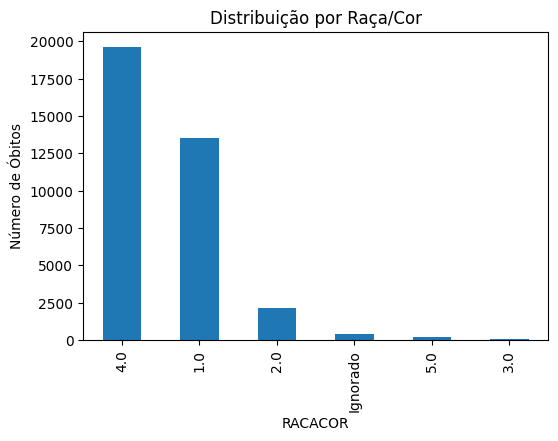

In [25]:
plt.figure(figsize=(6,4))
df_clean['RACACOR'].value_counts().plot(kind='bar')
plt.title("Distribuição por Raça/Cor")
plt.ylabel("Número de Óbitos")
plt.show()

In [26]:
df_clean['y_via_publica'].value_counts()
#Local de ocorrência, via publica

,count
y_via_publica,
1,18407
0,17531


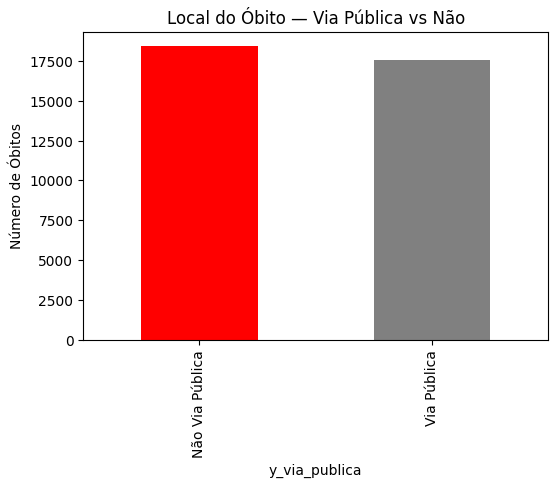

In [27]:
plt.figure(figsize=(6,4))
df_clean['y_via_publica'].value_counts().plot(kind='bar', color=['red','gray'])
plt.title("Local do Óbito — Via Pública vs Não")
plt.ylabel("Número de Óbitos")
plt.xticks([0,1], ['Não Via Pública', 'Via Pública'])
plt.show()

In [28]:
df_clean['CIRCOBITO'].value_counts()
#Circunstância do 1-acidente,2-suicídio,3-homicídio

,count
CIRCOBITO,
1.0,34885
Ignorado,1048
4.0,3
3.0,1
2.0,1


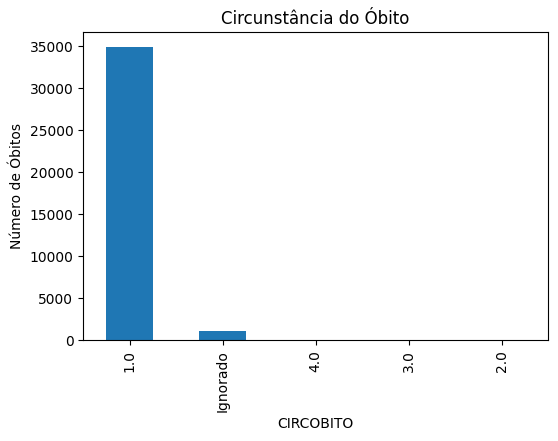

In [29]:
plt.figure(figsize=(6,4))
df_clean['CIRCOBITO'].value_counts().plot(kind='bar')
plt.title("Circunstância do Óbito")
plt.ylabel("Número de Óbitos")
plt.show()

In [30]:
df_clean['ACIDTRAB'].value_counts()
#relacionado ao trabalhoo 1-sim, 2-não

,count
ACIDTRAB,
Ignorado,18050
2.0,15924
1.0,1964


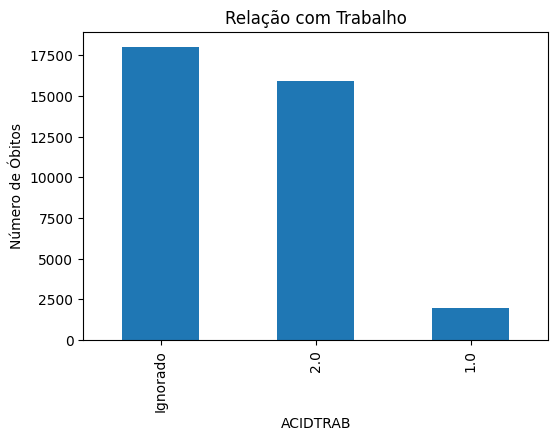

In [31]:
plt.figure(figsize=(6,4))
df_clean['ACIDTRAB'].value_counts().plot(kind='bar')
plt.title("Relação com Trabalho")
plt.ylabel("Número de Óbitos")
plt.show()

In [32]:
X = df_modelo.drop(columns=['y_via_publica'])
y = df_modelo['y_via_publica']

In [33]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,IDADE,SEXO_2.0,SEXO_Ignorado,RACACOR_2.0,RACACOR_3.0,RACACOR_4.0,RACACOR_5.0,RACACOR_Ignorado,ESC_2.0,ESC_3.0,...,ESTCIV_3.0,ESTCIV_4.0,ESTCIV_5.0,ESTCIV_Ignorado,CIRCOBITO_2.0,CIRCOBITO_3.0,CIRCOBITO_4.0,CIRCOBITO_Ignorado,ACIDTRAB_2.0,ACIDTRAB_Ignorado
22,51.0,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
39,24.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
75,64.0,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
80,50.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
89,43.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:,1]

In [41]:
print("REGRESSÃO LOGÍSTICA")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, y_prob_log))

REGRESSÃO LOGÍSTICA
Acurácia: 0.5601001669449082

Matriz de Confusão:
 [[1641 1865]
 [1297 2385]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.56      0.47      0.51      3506
           1       0.56      0.65      0.60      3682

    accuracy                           0.56      7188
   macro avg       0.56      0.56      0.56      7188
weighted avg       0.56      0.56      0.56      7188

ROC AUC: 0.5769341871604913


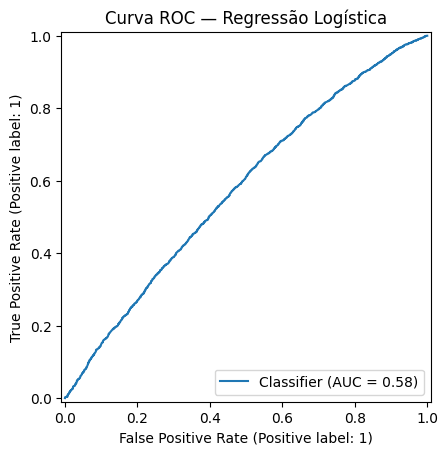

In [37]:
RocCurveDisplay.from_predictions(y_test, y_prob_log)
plt.title("Curva ROC — Regressão Logística")
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [42]:
print("RANDOM FOREST")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

RANDOM FOREST
Acurácia: 0.513355592654424

Matriz de Confusão:
 [[1781 1725]
 [1773 1909]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50      3506
           1       0.53      0.52      0.52      3682

    accuracy                           0.51      7188
   macro avg       0.51      0.51      0.51      7188
weighted avg       0.51      0.51      0.51      7188

ROC AUC: 0.5225186635899721


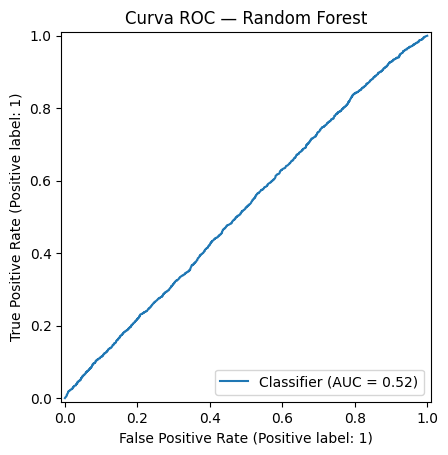

In [40]:
RocCurveDisplay.from_predictions(y_test, y_prob_rf)
plt.title("Curva ROC — Random Forest")
plt.show()